In [235]:
import pandas as pd
import numpy as np
from IPython.display import display, display_pretty, Javascript, HTML
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from matplotlib.backends.backend_pdf import PdfPages


# Show charts in notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# adding an empty line to test

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
# Load 2014 and 2015 survey household data
person14 = pd.read_csv(r'J:\Projects\Surveys\HHTravel\Survey2014\Data\Export\Release 3\General Release\Unzipped\2014-pr3-hhsurvey-persons.csv')
person15 = pd.read_csv(r'J:\Projects\Surveys\HHTravel\Survey2015\Data\Person\3_PSRC2015_Person_2015-07-27_v1.2.csv')

In [8]:
expwt14 = 'expwt_2'
expwt15 = 'expwt_h1415'

hh14.year = '2014'
hh15.year = '2015'

In [310]:
# Create dataframe with 14 and 15 data as columns
panel_person = pd.merge(person14, person15, on='personid', suffixes=['_14','_15'])

In [292]:
def compare_factors(factor):
    df = pd.DataFrame()
    print '------------------------------------'
    print 'change in ' + factor
    print '------------------------------------'
    df['14'] = panel_person.groupby(factor +'_14').count()['personid']
    df['15'] = panel_person.groupby(factor +'_15').count()['personid']
    df['change'] = df['15'] - df['14']
    df['% change'] = df['change']/df['14']
    # format as percent
    df['% change'] = pd.Series(["{0:.1f}%".format(val*100) for val in df['% change']], index = df.index)
    print df
    print '-------------------------------------'
    print '2014 mean: ' + str(panel_person[factor +'_14'].mean())
    print '2015 mean: ' + str(panel_person[factor +'_15'].mean())
    print 'mean change 2014-2015: '

In [293]:
def convert_to_percent(df,col):
    return pd.Series(["{0:.1f}%".format(val*100) for val in df[col]], index = df.index)

In [294]:
def compare_shares(factor):
    df = pd.DataFrame()
    print '------------------------------------'
    print 'change in ' + factor
    print '------------------------------------'
    df['14'] = panel_person.groupby(factor +'_14').count()['personid']/panel_person.count()['personid']
    df['15'] = panel_person.groupby(factor +'_15').count()['personid']/panel_person.count()['personid']
    df['change'] = df['15'] - df['14']
    df['% change'] = df['change']/df['14']
    # format as percent
    df['% change'] = convert_to_percent(df, '% change')
    print df
    print '-------------------------------------'
    print '2014 mean: ' + str(panel_person[factor +'_14'].mean())
    print '2015 mean: ' + str(panel_person[factor +'_15'].mean())
    print 'mean change 2014-2015: '
    display_charts(df, kind='bar', title=factor)

In [428]:
def chart_shares(factor, uselabel=False, to_pdf=False):
    ''''Show distribution of a factor. Specify a label column to use as index if desired'''
    df = pd.DataFrame()
    df['2014'] = panel_person.groupby(factor +'_14').count()['personid']/panel_person.count()['personid']
    df['2015'] = panel_person.groupby(factor +'_15').count()['personid']/panel_person.count()['personid']
    if uselabel:
        df['label'] = panel_person.groupby(factor +'_14_label').count()['personid'].index
        df.index = df.label
    plt.figure()
    df.plot(kind='bar', alpha=0.8, title=factor)
    if to_pdf:
        pdf_pages.savefig()       

In [380]:
def add_labels(fields, labels):
    '''adds frequency labels for a set of like fields'''

    for field in fields:
        panel_person[field + '_label'] = panel_person[field]
        panel_person[field].fillna(0,inplace=True)
        panel_person[field + '_label'] = ([labels[x] for x in panel_person[field]])

In [389]:
labels = { 1: "6-7 days/week",
                    2: "5 days/week",
                    3: "2-4 days/week",
                    4: "1 day/week",
                    5: "1-3 times in the past 30 days",
                    6: "Not in the past 30 days",
                    7: "I never do this",
                    0: 'NA',
                   -99: 'NA',
                   'nan': 'NA'
    }

freq_fields = ['transit_freq', 'bike_freq', 'walk_freq', 'tollfreq']
fields14 = [fname + '_14' for fname in freq_fields]
fields15 = [fname + '_15' for fname in freq_fields]

add_labels(fields14+fields15, labels)

In [390]:
labels = { 1: "6-7 days/week",
                    2: "5 days/week",
                    3: "4 days/week",
                    4: "3 days/week",
                    5: "2 days/week",
                    6: "1 day/week",
                    7: "few times per month",
                    8: "less than monthly",
                    9: "never",
                    10: 'NA',
                    0: 'NA',
                   -99: 'NA'
    }

freq_fields = ['commute_freq', 'telecommute_freq']
fields14 = [fname + '_14' for fname in freq_fields]
fields15 = [fname + '_15' for fname in freq_fields]

add_labels(fields14+fields15, labels)

----

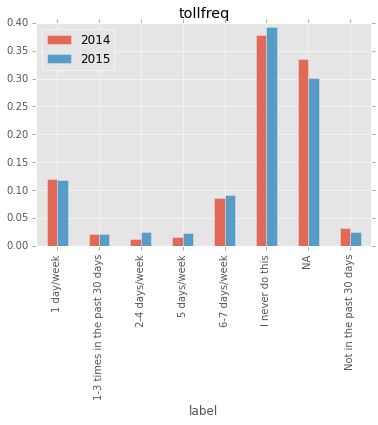

In [437]:
chart_shares('tollfreq', uselabel=True, to_pdf=True)

AttributeError: 'NoneType' object has no attribute 'endStream'

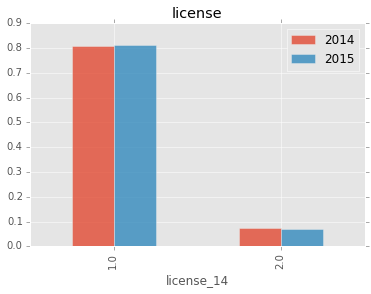

In [443]:
chart_shares('license', to_pdf=True)

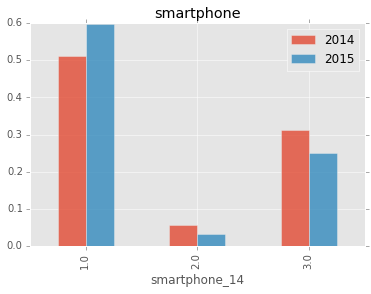

In [439]:
chart_shares('smartphone', to_pdf=True)

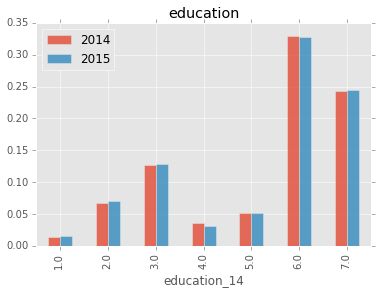

In [440]:
chart_shares('education', to_pdf=True)

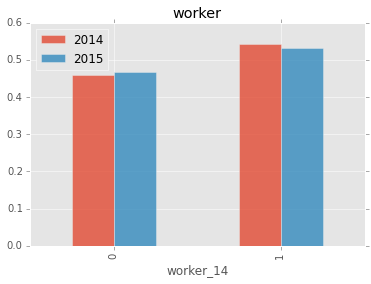

In [397]:
chart_shares('worker')

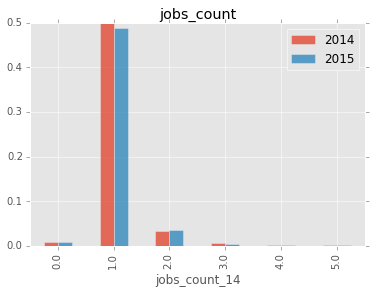

In [398]:
chart_shares('jobs_count')

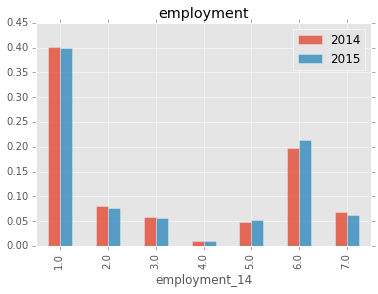

In [399]:
chart_shares('employment')

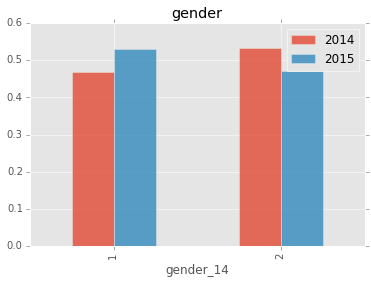

In [400]:
chart_shares('gender')

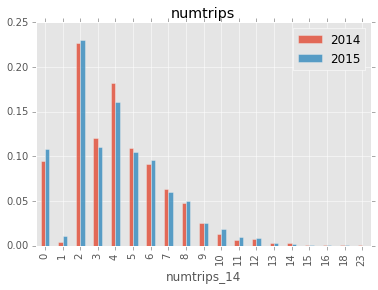

In [401]:
chart_shares('numtrips')

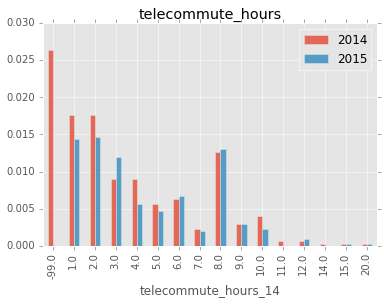

In [402]:
chart_shares('telecommute_hours')

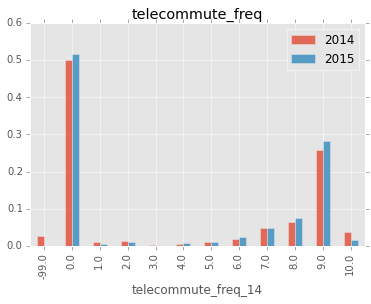

In [403]:
chart_shares('telecommute_freq')

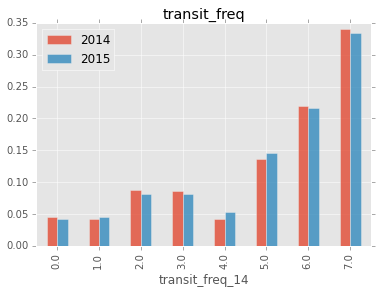

In [404]:
chart_shares('transit_freq')

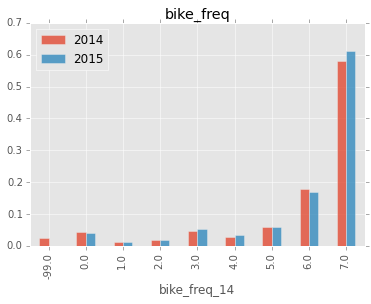

In [405]:
chart_shares('bike_freq')

Leaving kitsap and Snohomish, going to King

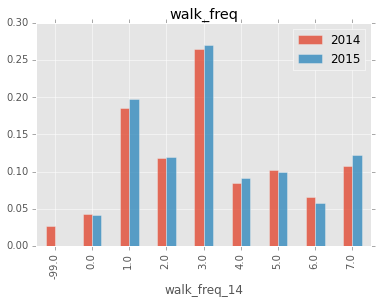

In [406]:
chart_shares('walk_freq')